### 1 task
Пусть ξ1, ξ2, . . . — последовательность независимых случайных величин из заданного распределения. Привести графическую иллюстрацию закона больших чисел.
Hint: можно, например, построить график выборочного среднего Sn/n в зависимости от n и посмотреть, как он ведёт себя при увеличении n.

In [136]:
import numpy as np
import matplotlib.pyplot as plt
dfn, dfd = 7, 9
from scipy.stats import f
variance = f.var(dfn, dfd)
expectation = f.mean(dfn, dfd)

In [137]:
x = []
y = []
for n in range(1, 10000, 10):
    numbers = np.random.f(dfn, dfd, n)
    s_n = sum(numbers)
    y.append(s_n/n)
    x.append(n)

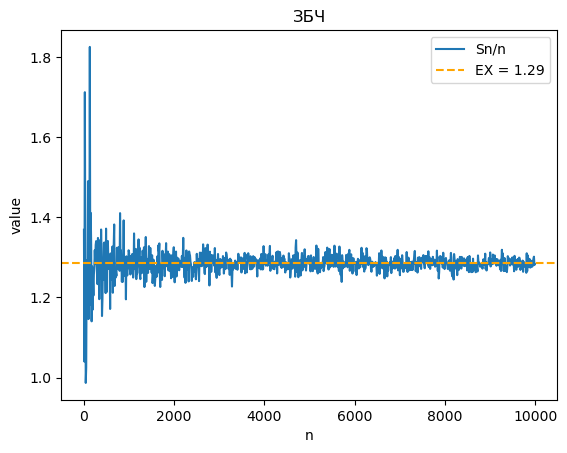

In [138]:
plt.plot(x, y, label = "Sn/n")
plt.ylabel("value")
plt.xlabel("n")
plt.axhline(expectation, linestyle='--', color='orange', label=f"EX = {expectation:0.2f}")
plt.legend()
plt.title("ЗБЧ")
plt.show()

### Task 2
Пусть ξ1, ξ2, . . . — последовательность независимых случайных величин из заданного распределения. Привести графическую иллюстрацию центральной предельной теоремы.
Hint: можно, например, эмпирически оценить распределение случайной величины $\frac{S_n - nEξ1}{\sqrt{nDξ1}}$ при разных n (= 5, 10, 20, 40, 80, . . .) и сравнить его со стандартным нормальным. Также, нужно придумать, как посчитать «расстояние» между этими двумя распределениями.

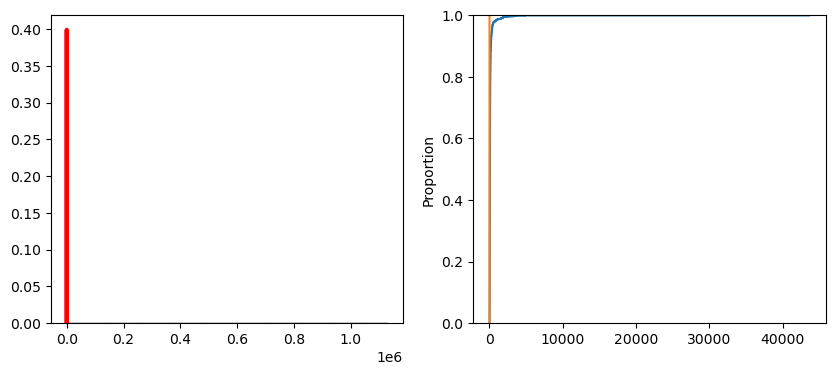

In [180]:
from scipy.stats import norm
import seaborn as sns
values_for_imperiar = []

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

r = f(dfn, dfd)
values = [(sum(f.rvs(6, 2, size=i)) - (expectation * i))/((i*variance)**0.5) for i in range(50, 50000, 5)]

ax1.hist(values, color = 'blue', edgecolor = 'black', density=True, bins = int(150))

x = np.arange (-4, 4, 0.001)
ax1.plot (x, norm.pdf(x, 0, 1), color='red', linewidth= 3)

for i in range(1000):
    e = f.rvs(6, 2, size=200)
    s = sum(e)
    values_for_imperiar.append((s - (expectation * 200)) / ((200 * variance) ** 0.5))

ax2 = sns.ecdfplot(values_for_imperiar)
x = np.linspace(-4,4,100)
norm_rv = norm(0, 1)
cdf = norm_rv.cdf(x)
ax2.plot(x, cdf)
plt.show()